In [1]:
import requests
import pprint

In [ ]:
"""
To get the list of the latest foreign exchange rates
GET /latest
To 
GET /latest?symbols=USD,GBP
"""

In [2]:
base_url = 'https://api.exchangeratesapi.io/'

In [3]:
end_path_latest = 'latest'

In [5]:
"""
exchange USD,CAD
"""
given_currency = input('Provide value that you need to see...')
end_path_exchange = f'latest?symbols={given_currency}&base=USD'

In [6]:
print(end_path_exchange)

latest?symbols=CAD&base=USD


In [59]:
end_point = f'{base_url}{end_path_latest}'
# end_point = f'{base_url}{end_path_exchange}'

In [60]:
print(end_point)

https://api.exchangeratesapi.io/latest


In [61]:
result = requests.get(end_point)

In [62]:
"""
the latest exchange rates
"""
# print(result.status_code)
# print(result.json())
pprint.pprint(result.text)

'{"rates":{"CAD":1.5331,"HKD":9.401,"ISK":152.9,"PHP":59.09,"DKK":7.4361,"HUF":361.43,"CZK":26.195,"AUD":1.5605,"RON":4.875,"SEK":10.1388,"IDR":17353.51,"INR":89.5766,"BRL":6.6644,"RUB":90.6697,"HRK":7.583,"JPY":128.83,"THB":36.799,"CHF":1.0986,"SGD":1.6106,"PLN":4.5186,"BGN":1.9558,"TRY":9.0168,"CNY":7.8385,"NOK":10.4012,"NZD":1.6622,"ZAR":18.1025,"USD":1.2121,"MXN":25.2879,"ILS":4.0072,"GBP":0.87053,"KRW":1367.1,"MYR":4.9096},"base":"EUR","date":"2021-02-26"}'


In [63]:
currency = []
exchange_rate = []

In [64]:
data = result.json()
# data.keys()
data['rates']
# print(type(data['rates']))
# print(data['rates']['CAD'])

for key, value in data['rates'].items():
    exchange_rate.append(data['rates'][key])
    currency.append(key)
    # print(data['rates'][key])
    # print(key)

In [68]:
lst = zip(currency, exchange_rate)
# print(*lst)
for data in lst:
    print(data)

In [ ]:
"""
exchanger
"""

In [14]:
currency = currency[0]
rate = exchange_rate[0]

amount_to_convert = 10 # 10 USD to CAD
def counter(cur, rt, amount):
    return amount*rate

counter(currency, rate, amount_to_convert)

12.480163599

In [ ]:
"""
graph
"""

In [45]:
import datetime


_base = 'USD'
_currency = 'CAD'
date_until = datetime.datetime.now().strftime('%Y-%m-%d')
date_start = datetime.timedelta(days=7)
date_from = (datetime.datetime.now() - date_start).strftime('%Y-%m-%d')

history_period = f'{base_url}history?start_at={date_from}&end_at={date_until}&symbols={_currency}&base={_base}'

In [46]:
print(history_period)

https://api.exchangeratesapi.io/history?start_at=2021-02-19&end_at=2021-02-26&symbols=CAD&base=USD


In [47]:
history_result = requests.get(history_period)

In [48]:
history_result.text

'{"rates":{"2021-02-22":{"CAD":1.2633314102},"2021-02-24":{"CAD":1.2568746913},"2021-02-19":{"CAD":1.2609770162},"2021-02-25":{"CAD":1.2480163599},"2021-02-23":{"CAD":1.2615498641}},"start_at":"2021-02-19","base":"USD","end_at":"2021-02-26"}'

In [49]:
date = []
_exchange_rate = []

In [50]:
"""
keys - date
values - exchange rate
"""

_result = history_result.json()

for key, value in _result['rates'].items():
    _exchange_rate.append(_result['rates'][key])
    date.append(key)

In [51]:
print(date, '\n', _exchange_rate)

['2021-02-22', '2021-02-24', '2021-02-19', '2021-02-25', '2021-02-23'] 
 [{'CAD': 1.2633314102}, {'CAD': 1.2568746913}, {'CAD': 1.2609770162}, {'CAD': 1.2480163599}, {'CAD': 1.2615498641}]


In [52]:
_exchange_rate_keys = []
_exchange_rate_value = []

for data in _exchange_rate:
    for key, value in data.items():
        _exchange_rate_keys.append(key)
        _exchange_rate_value.append(value)

In [53]:
print(_exchange_rate_keys, '\n', _exchange_rate_value)

['CAD', 'CAD', 'CAD', 'CAD', 'CAD'] 
 [1.2633314102, 1.2568746913, 1.2609770162, 1.2480163599, 1.2615498641]


In [54]:
exchange_rate_result = zip(date, _exchange_rate_value)

In [55]:
print(*exchange_rate_result)

('2021-02-22', 1.2633314102) ('2021-02-24', 1.2568746913) ('2021-02-19', 1.2609770162) ('2021-02-25', 1.2480163599) ('2021-02-23', 1.2615498641)


In [56]:
print(date, '\n', _exchange_rate_value)

['2021-02-22', '2021-02-24', '2021-02-19', '2021-02-25', '2021-02-23'] 
 [1.2633314102, 1.2568746913, 1.2609770162, 1.2480163599, 1.2615498641]


In [57]:
from matplotlib import pyplot as plt 

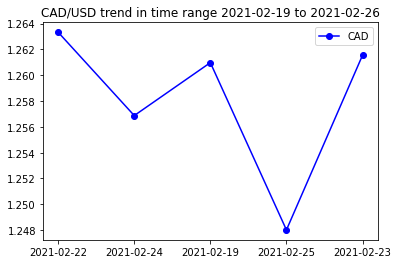

In [58]:
plt.plot(date, _exchange_rate_value, '-ob')
plt.title(f"{_currency}/{_base} trend in time range {date_from} to {date_until}")
plt.legend([f'{_currency}'])
plt.show()